In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import yaml
import numpy as np

In [2]:
# to be replaced with final data path
PATH_TO_DATA = '../../data/dja_shortlabels.xlsx'
PATH_TO_INDEX_INTERPRETATIONS = '../../R/value_labels.yml'

In [3]:
consultation_data = pd.read_excel(PATH_TO_DATA)

In [5]:
variable_labels = pd.read_csv('../../data/Variabelen_DJA_shortlabels.csv', encoding='ISO-8859-1')
index_interpretations = yaml.safe_load(open(PATH_TO_INDEX_INTERPRETATIONS))

In [20]:
def get_plotting_data(data_frame, variable_labels, index_interpretations, column_name):
    column_interpretation = variable_labels.loc[variable_labels['short']==column_name]['Label'].values[0]
    relevant_column_counts = data_frame[column_name].value_counts()
    relevant_column_counts_sorted = relevant_column_counts.sort_index(ascending=True)
    
    label_indices = relevant_column_counts_sorted.index.values
    
    labels = []
    
    for index in label_indices:
        try:
            current_label_interpretation = index_interpretations[column_name][str(int(index))]
        except:
            current_label_interpretation = 'unknown'
        
        labels.append(current_label_interpretation)
    
    values = relevant_column_counts_sorted.values
    
    return labels, values, column_interpretation

In [50]:
def finalize_figure(column_interpretation, save_folder, prefix, column_name):
    if len(prefix) > 0:
        title = '%s\n%s' % (prefix, column_interpretation)
    else:
        title = column_interpretation
        
    plt.title(title)
    
    if len(save_folder) > 0:
        plt.savefig('%s/%s.png' % (save_folder, column_name))

In [46]:
def create_pie_chart(data_frame, variable_labels, index_interpretations, column_name, save_folder = '', prefix = ''):
    (labels, values, column_interpretation) = \
      get_plotting_data(data_frame, variable_labels, index_interpretations, column_name)
    
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct=format_autopct(values), counterclock=False, startangle=90)
    plt.ylabel('')
    
    finalize_figure(column_interpretation, save_folder, prefix, column_name)

In [47]:
def create_bar_chart(data_frame, variable_labels, index_interpretations, column_name, save_folder = '', prefix = ''):
    (labels, values, column_interpretation) = \
      get_plotting_data(data_frame, variable_labels, index_interpretations, column_name)
    
    plt.figure(figsize=(6,6))
    plt.bar(x = labels, height = values)
    plt.ylabel('')
    plt.xticks(rotation = 90)
    
    finalize_figure(column_interpretation, save_folder, prefix, column_name)

In [167]:
test = consultation_data['quit'].value_counts()

In [172]:
test.values

array([476, 360, 264,  32])

In [39]:
def format_autopct(values):
    def autopct_formatted(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return autopct_formatted

In [42]:
single_column_answers = ['quit', 'major_changes', 'carreer_success',\
                         'award_fair', 'award_lottery', 'award_time',\
                         'award_bandwagon', 'co_private', 'co_connections',\
                         'co_irrelevant', 'review_info',\
                         'review_confidence', 'review_informative',\
                         'review_more', 'review_government']

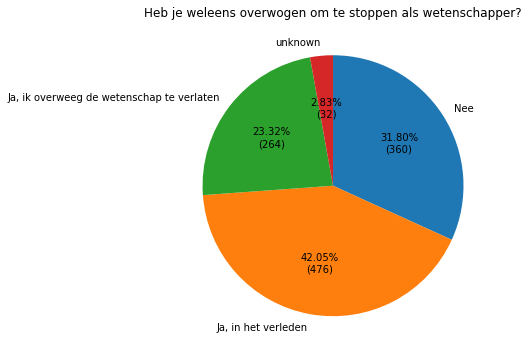

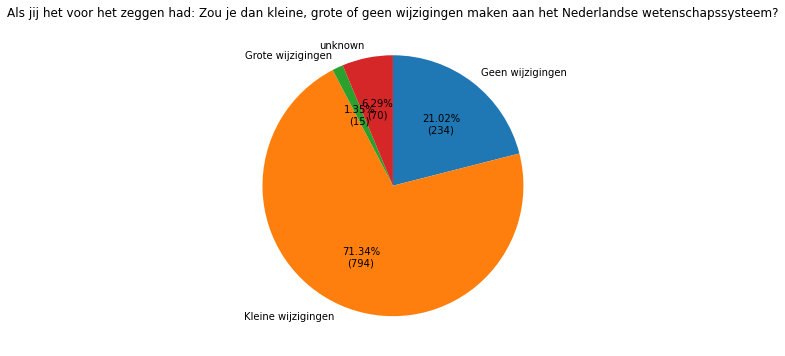

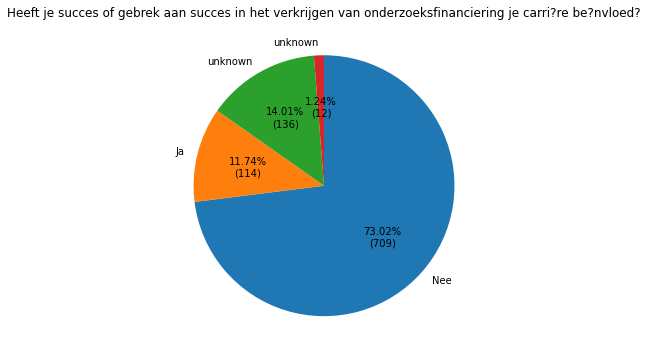

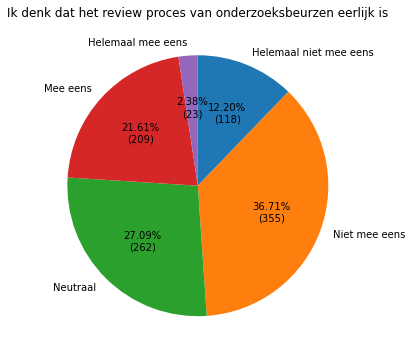

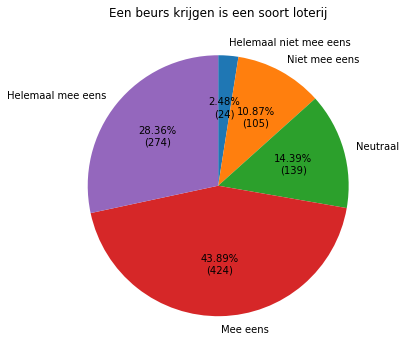

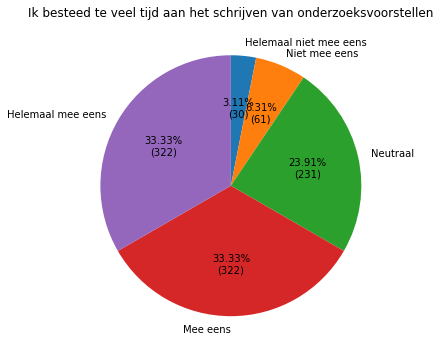

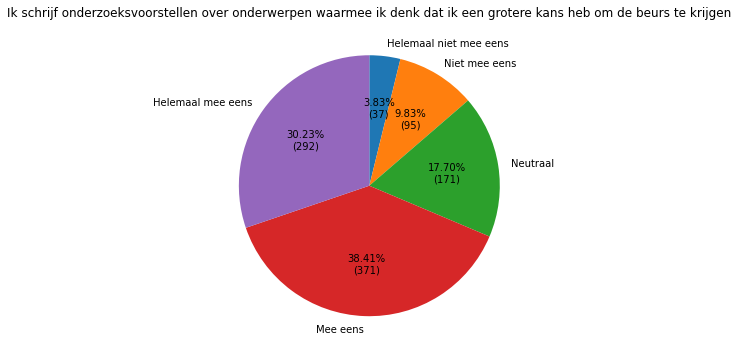

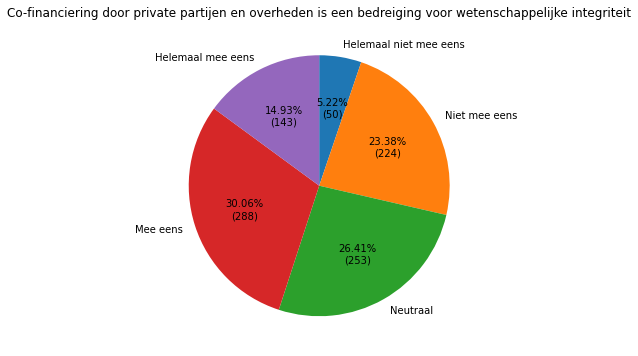

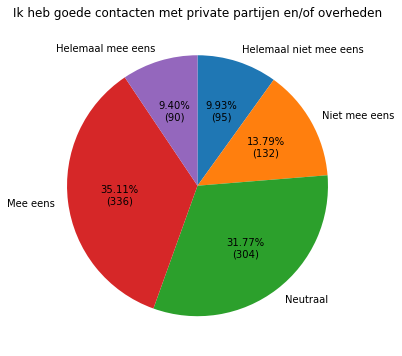

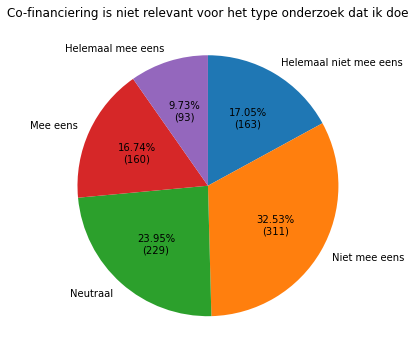

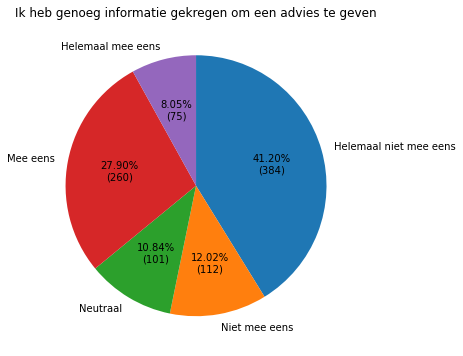

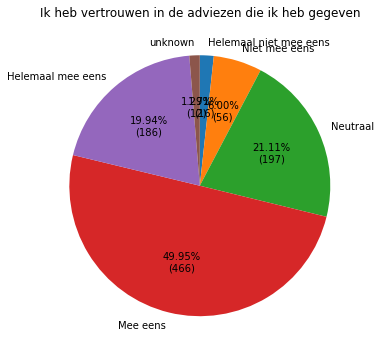

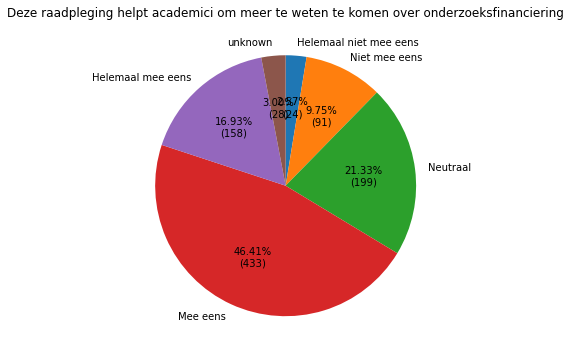

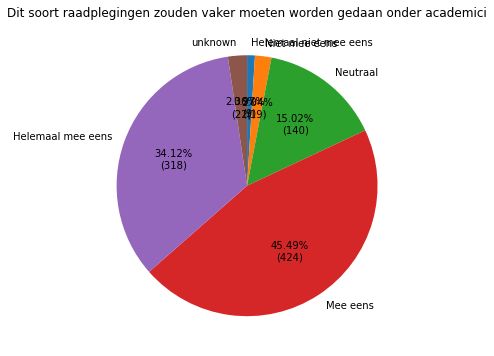

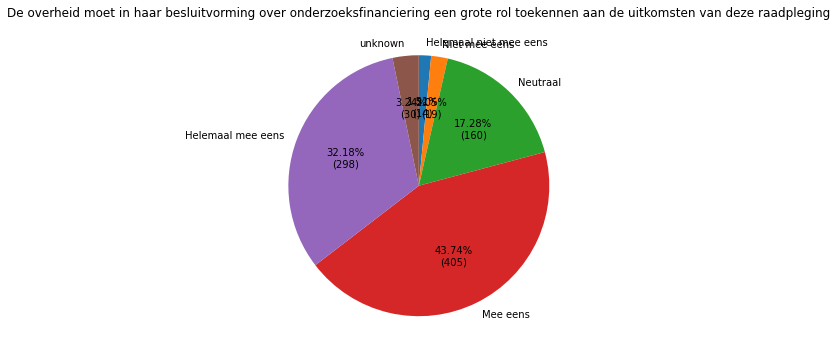

In [51]:
PLOTTING_FOLDER = 'plots_pie'
if not os.path.exists(PLOTTING_FOLDER):
    os.mkdir(PLOTTING_FOLDER)

for category in single_column_answers:
    create_pie_chart(consultation_data, variable_labels, index_interpretations, category, PLOTTING_FOLDER)

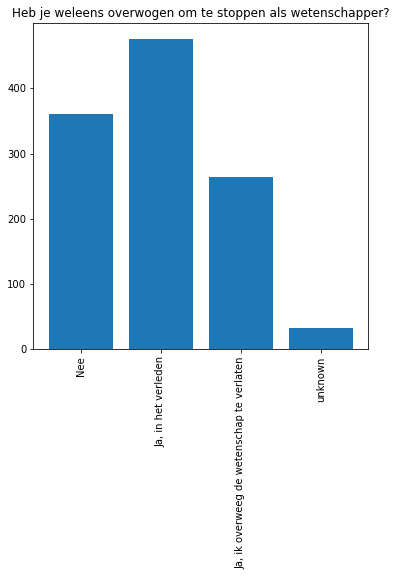

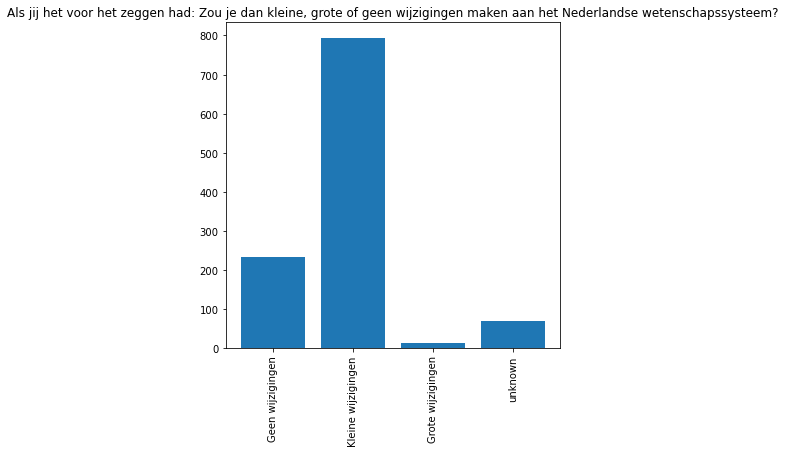

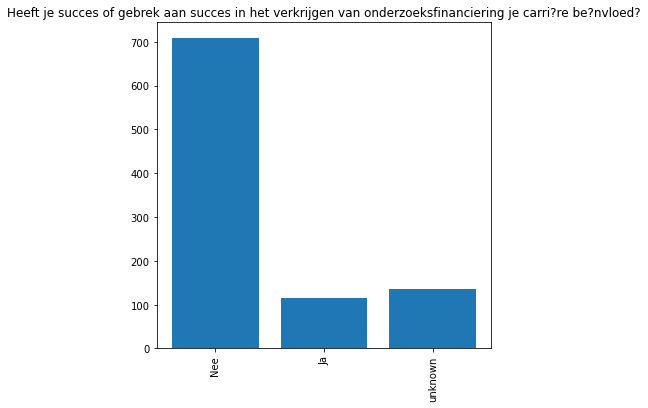

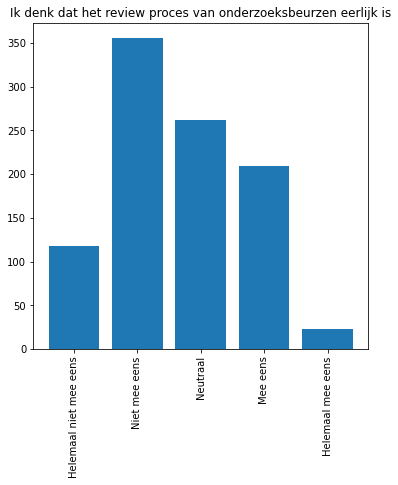

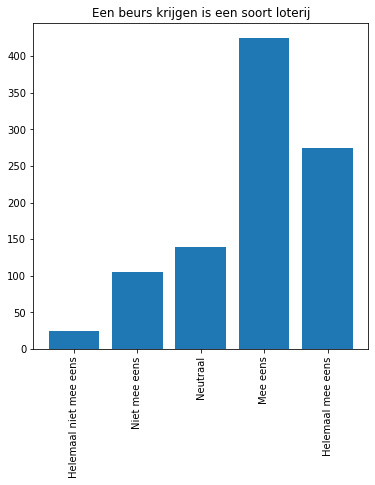

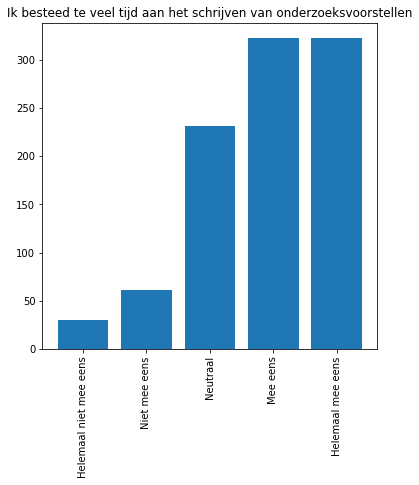

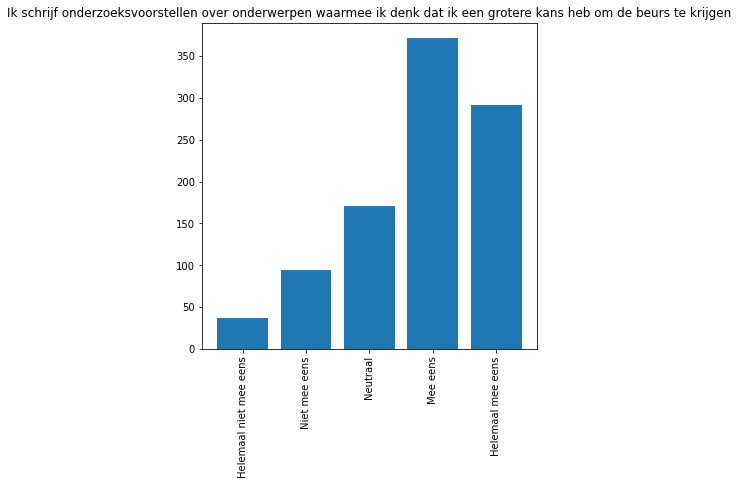

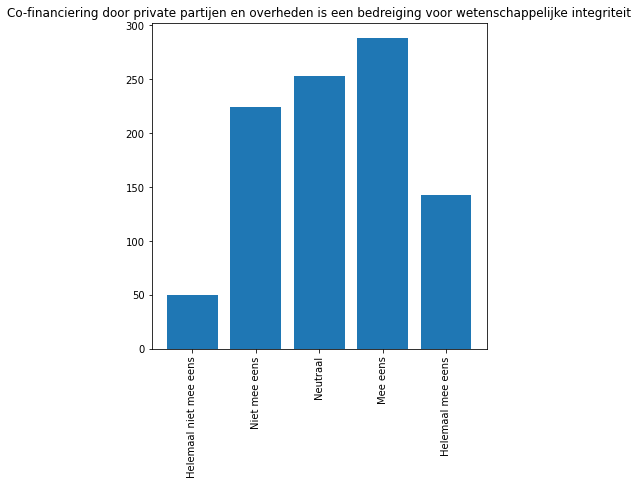

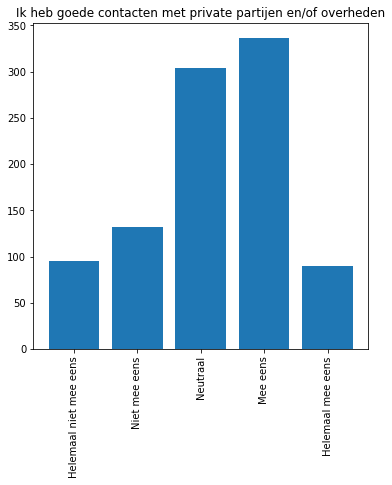

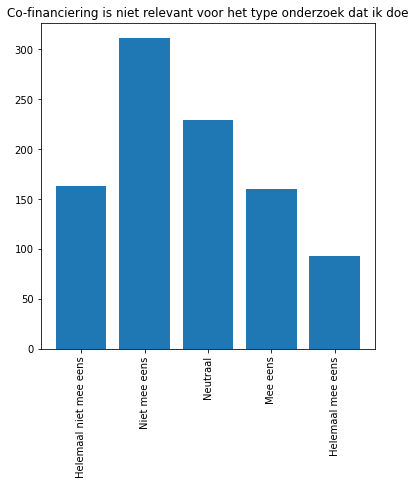

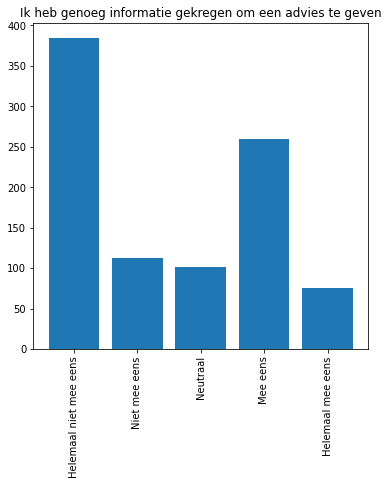

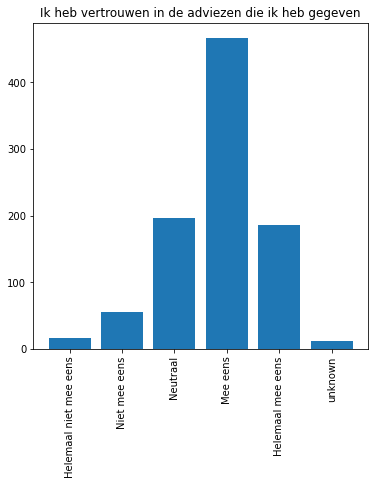

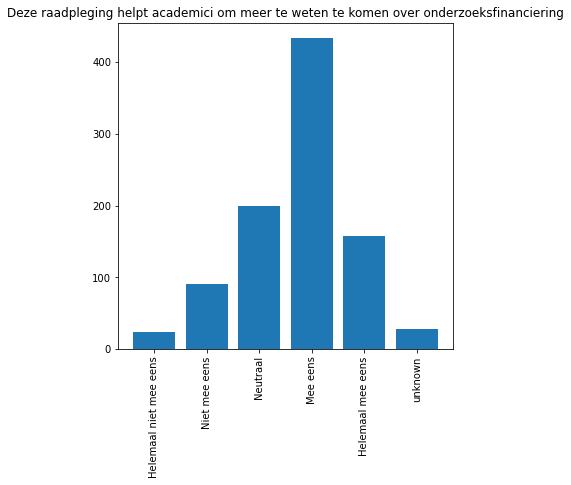

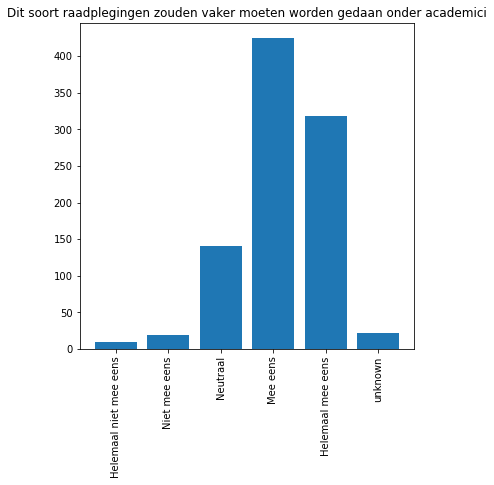

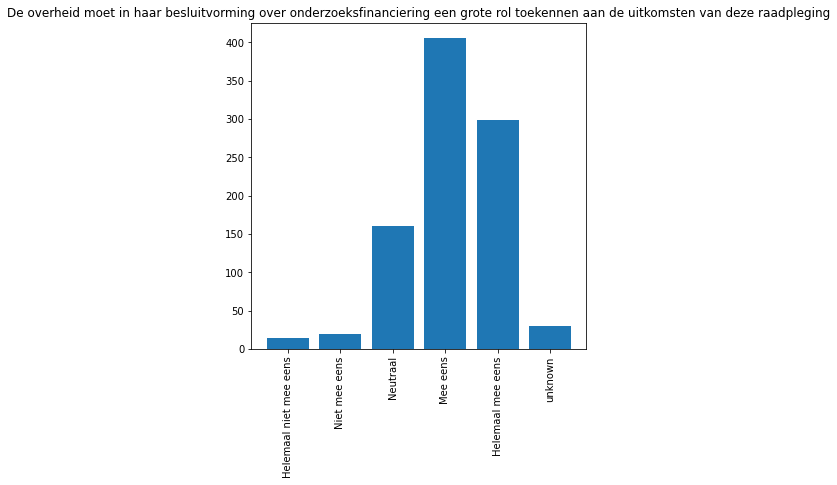

In [52]:
PLOTTING_FOLDER = 'plots_bar'
if not os.path.exists(PLOTTING_FOLDER):
    os.mkdir(PLOTTING_FOLDER)

for category in single_column_answers:
    create_bar_chart(consultation_data, variable_labels, index_interpretations, category)